In [1]:
# import libraries
import pandas as pd
import yellowbrick

In [2]:
#Step 1:  Load data into a dataframe

addr1 = "loan_data_set.csv"
data = pd.read_csv(addr1)

In [3]:
# Step 2:  check the dimension of the table

print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (614, 13)


In [4]:
#Step 3:  Look at the data

print(data.head(5))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
#Step 5:  what type of variables are in the table 

print("Describe Data")
print(data.describe())

print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
Summarized Data
         Loan_ID Gender Married Dependents Education Self_Employed  \
count   

In [6]:
# ADDED:
# also, wanted to look at the non-numeric variables, so used describe, setting exclude to 'number':
# also added info to determine the data types


# describe non-numeric data
print(data.describe(exclude='number'))
# print(data['Loan_Status'])

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001345   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422  


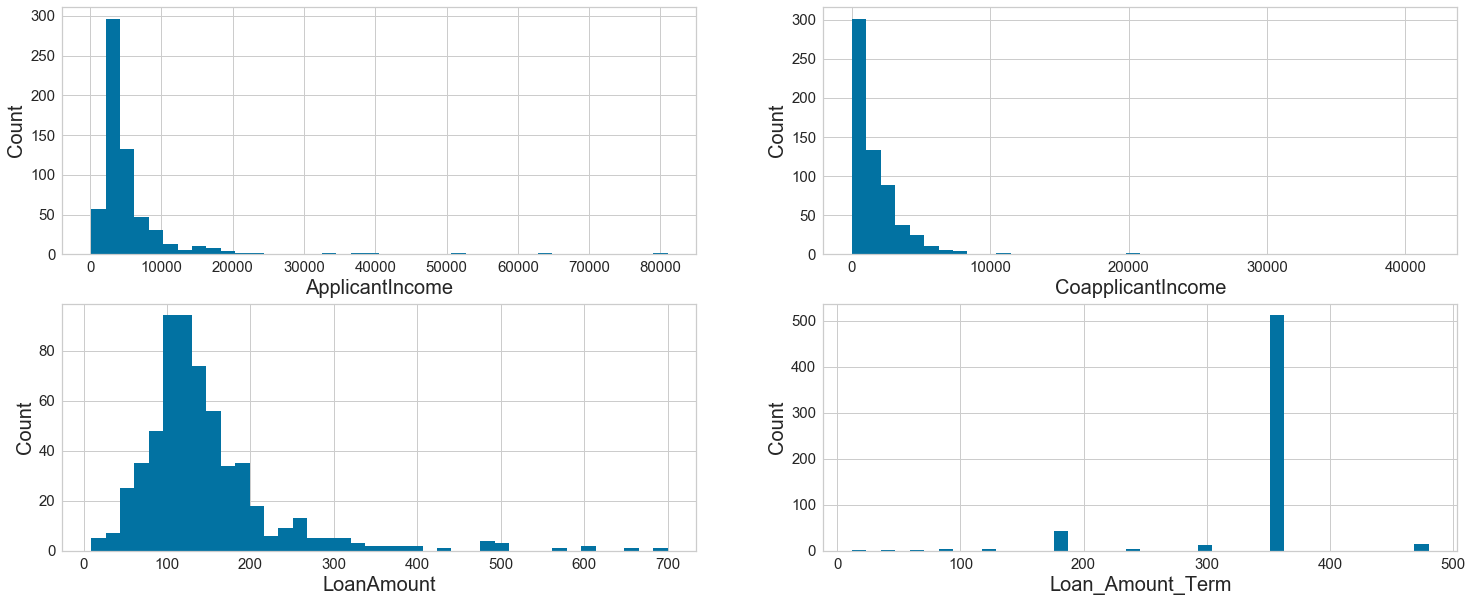

In [7]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (25, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()


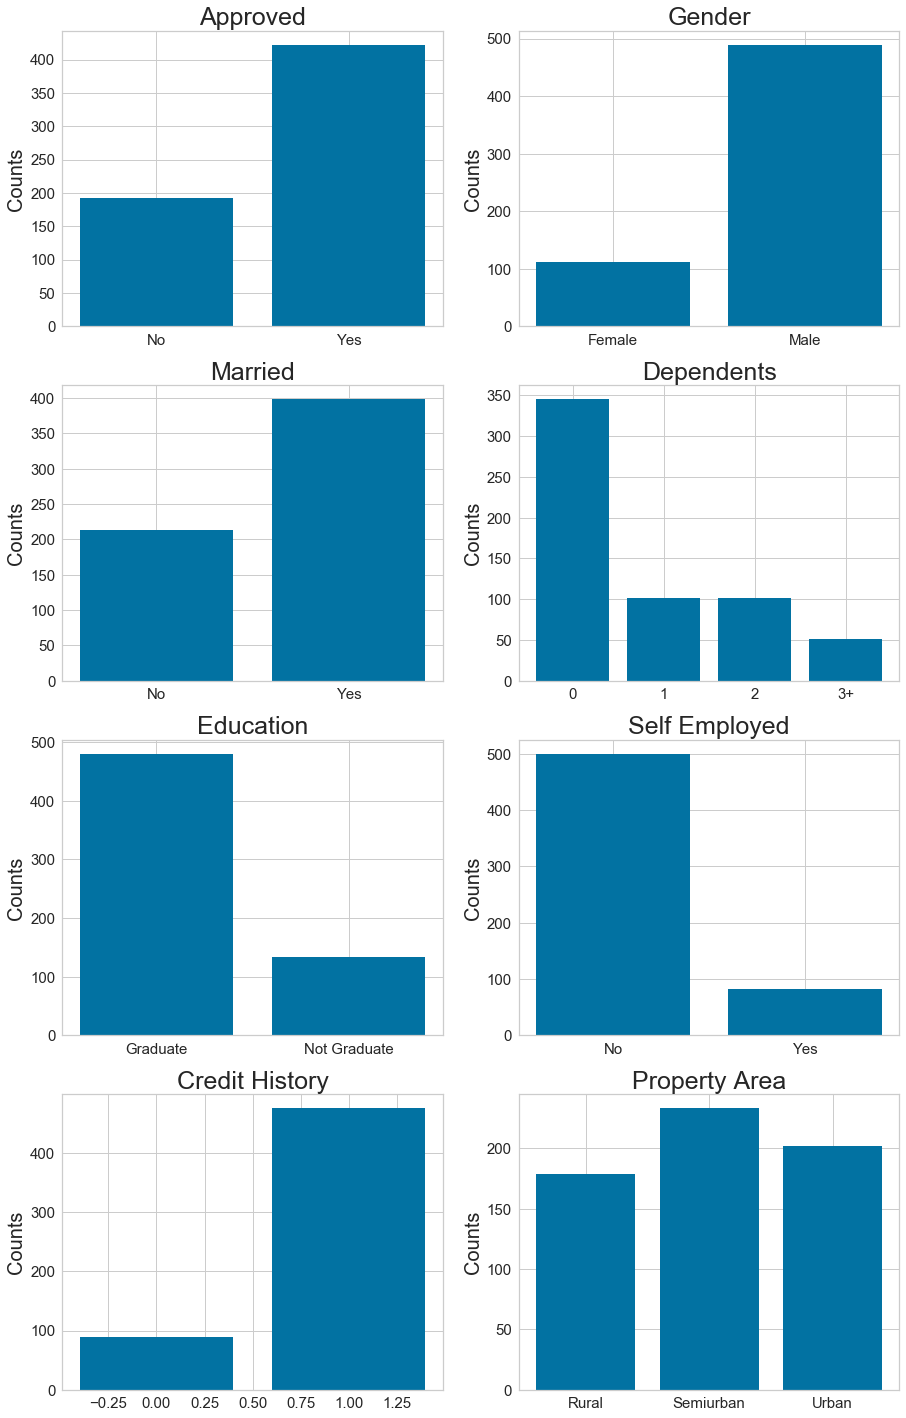

In [8]:
#7:  Barcharts: set up the figure size
#%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 25)

# make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 2)

# make the data read to feed into the visulizer
X_Approved = data.replace({'Loan_Status': {'Y': 'Yes', 'N': 'No'}}).groupby('Loan_Status').size().reset_index(name='Counts')['Loan_Status']
Y_Approved = data.replace({'Loan_Status': {'Y': 'Yes', 'N': 'No'}}).groupby('Loan_Status').size().reset_index(name='Counts')['Counts']
    
# make the bar plot
axes[0, 0].bar(X_Approved, Y_Approved)
axes[0, 0].set_title('Approved', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_Gender = data.groupby('Gender').size().reset_index(name='Counts')['Gender']
Y_Gender = data.groupby('Gender').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_Gender, Y_Gender)
axes[0, 1].set_title('Gender', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_Married = data.groupby('Married').size().reset_index(name='Counts')['Married']
Y_Married = data.groupby('Married').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_Married, Y_Married)
axes[1, 0].set_title('Married', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
#plt.show()


# make the data read to feed into the visulizer
X_Dependents = data.groupby('Dependents').size().reset_index(name='Counts')['Dependents']
Y_Dependents = data.groupby('Dependents').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 1].bar(X_Dependents, Y_Dependents)
axes[1, 1].set_title('Dependents', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()



# make the data read to feed into the visulizer
X_Education = data.groupby('Education').size().reset_index(name='Counts')['Education']
Y_Education = data.groupby('Education').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[2, 0].bar(X_Education, Y_Education)
axes[2, 0].set_title('Education', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
#plt.show()



# make the data read to feed into the visulizer
X_Self_Employed = data.groupby('Self_Employed').size().reset_index(name='Counts')['Self_Employed']
Y_Self_Employed = data.groupby('Self_Employed').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[2, 1].bar(X_Self_Employed, Y_Self_Employed)
axes[2, 1].set_title('Self Employed', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)
#plt.show()



# make the data read to feed into the visulizer
X_Credit_History = data.groupby('Credit_History').size().reset_index(name='Counts')['Credit_History']
Y_Credit_History = data.groupby('Credit_History').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[3, 0].bar(X_Credit_History, Y_Credit_History)
axes[3, 0].set_title('Credit History', fontsize=25)
axes[3, 0].set_ylabel('Counts', fontsize=20)
axes[3, 0].tick_params(axis='both', labelsize=15)
#plt.show()



# make the data read to feed into the visulizer
X_Property = data.groupby('Property_Area').size().reset_index(name='Counts')['Property_Area']
Y_Property = data.groupby('Property_Area').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[3, 1].bar(X_Property, Y_Property)
axes[3, 1].set_title('Property Area', fontsize=25)
axes[3, 1].set_ylabel('Counts', fontsize=20)
axes[3, 1].tick_params(axis='both', labelsize=15)



# ADDED:
    
Observations:
    Approved - about twice as many applications wered approved vs. not-approved
    Gender - About 5 times as many applied than women
    Married - About twice as many applicants were married vs non-married
    Dependents - most applicants had zero dependents; about 3 times as likely to be approved
    Education - About 4 times as many applicants were graduates
    Self-Employed - MOre than 5 times as many applicants were not self-employed
    Credit History - About 5 times as many applicants had a credit history report
    Property Area - roughly evenly distributed with slightly more for semiurban
    

C:\Users\Tim\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


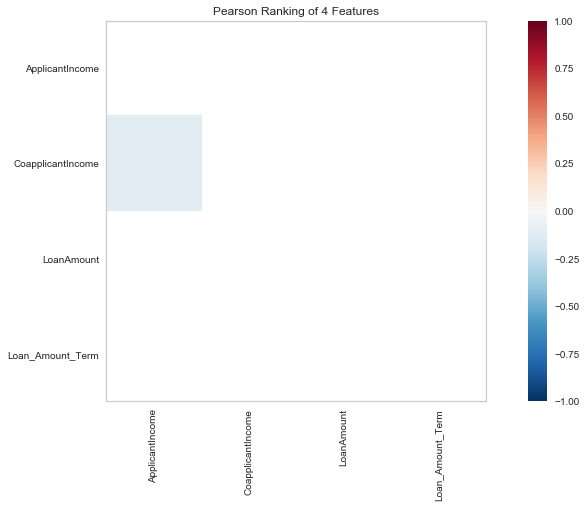

In [9]:
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
#plt.show()


C:\Users\Tim\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Tim\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


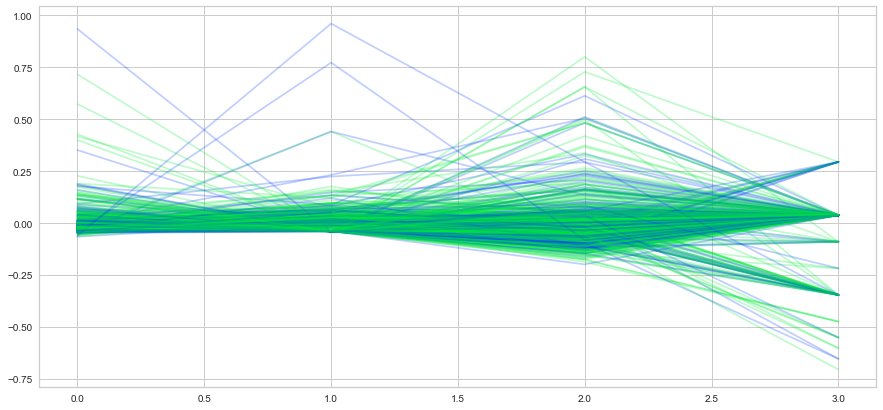

In [10]:
# Step 9:  Compare variables against Approved and Not Approved
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-Approved', 'Approved']
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.Loan_Status.as_matrix()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


# set x axis labels
ax.set_xlabel(num_features, fontsize=20)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();

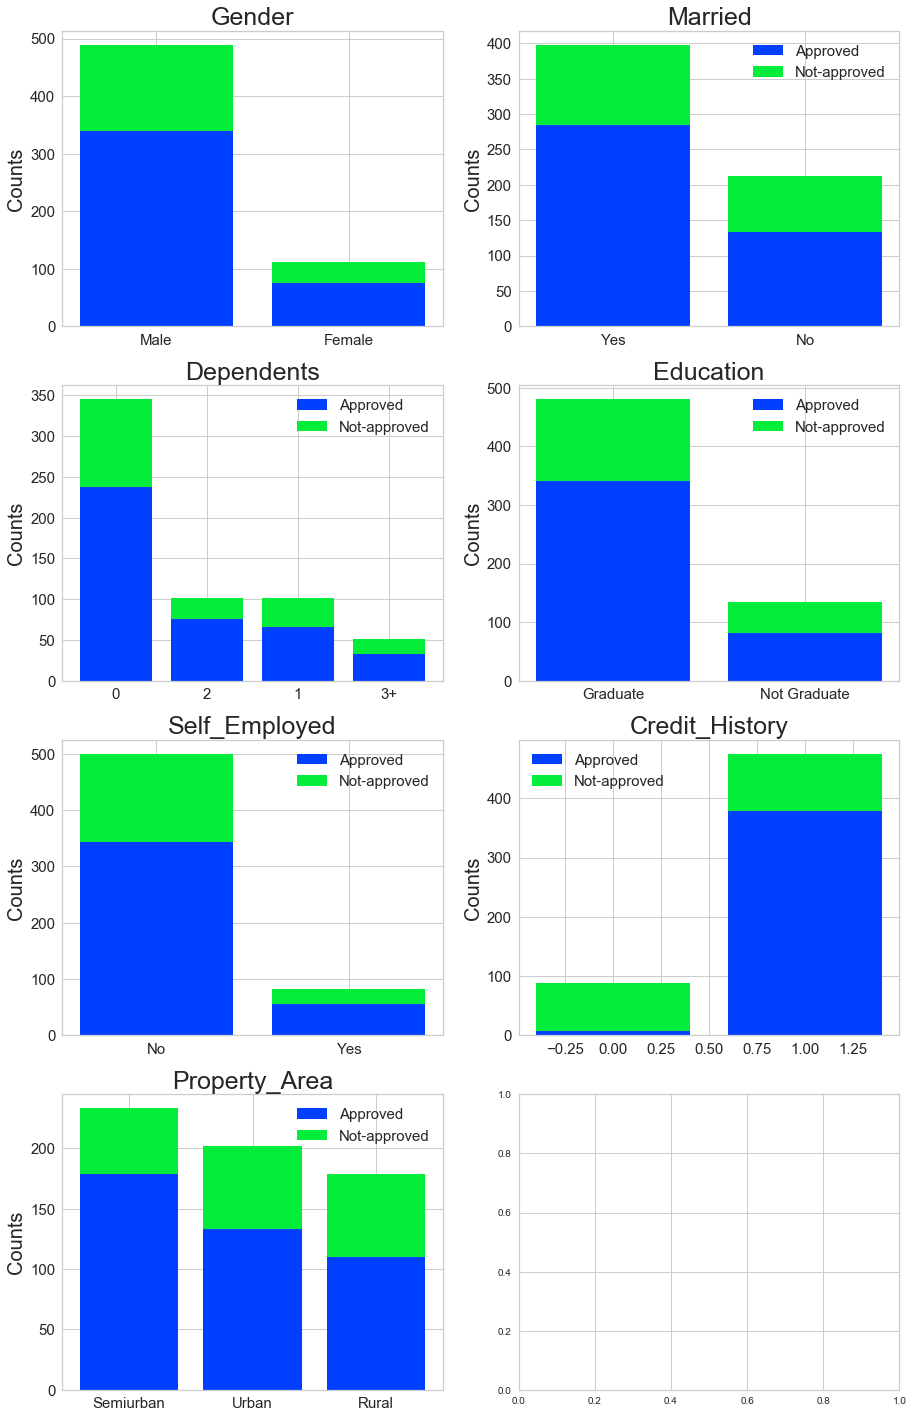

In [11]:
# Step 10 - stacked bar charts to compare approved/not approved
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 25)

# make subplots
fig, axes = plt.subplots(nrows = 4, ncols = 2)

# make the data read to feed into the visulizer
Gender_approved = data[data['Loan_Status']=='Y']['Gender'].value_counts()
Gender_not_approved = data[data['Loan_Status']=='N']['Gender'].value_counts()
Gender_not_approved = Gender_not_approved.reindex(index = Gender_approved.index)
# make the bar plot
p1 = axes[0, 0].bar(Gender_approved.index, Gender_approved.values)
p2 = axes[0, 0].bar(Gender_not_approved.index, Gender_not_approved.values, bottom=Gender_approved.values)
axes[0, 0].set_title('Gender', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
Married_approved = data[data['Loan_Status']=='Y']['Married'].value_counts()
Married_not_approved = data[data['Loan_Status']=='N']['Married'].value_counts()
Married_not_approved = Married_not_approved.reindex(index = Married_approved.index)
# make the bar plot
p3 = axes[0, 1].bar(Married_approved.index, Married_approved.values)
p4 = axes[0, 1].bar(Married_not_approved.index, Married_not_approved.values, bottom=Married_approved.values)
axes[0, 1].set_title('Married', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Approved', 'Not-approved'), fontsize = 15)


# make the data read to feed into the visulizer
Dependents_approved = data[data['Loan_Status']=='Y']['Dependents'].value_counts()
Dependents_not_approved = data[data['Loan_Status']=='N']['Dependents'].value_counts()
Dependents_not_approved = Dependents_not_approved.reindex(index = Dependents_approved.index)
# make the bar plot
p5 = axes[1, 0].bar(Dependents_approved.index, Dependents_approved.values)
p6 = axes[1, 0].bar(Dependents_not_approved.index, Dependents_not_approved.values, bottom=Dependents_approved.values)
axes[1, 0].set_title('Dependents', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Approved', 'Not-approved'), fontsize = 15)


# make the data read to feed into the visulizer
Education_approved = data[data['Loan_Status']=='Y']['Education'].value_counts()
Education_not_approved = data[data['Loan_Status']=='N']['Education'].value_counts()
Education_not_approved = Education_not_approved.reindex(index = Education_approved.index)
# make the bar plot
p7 = axes[1, 1].bar(Education_approved.index, Education_approved.values)
p8 = axes[1, 1].bar(Education_not_approved.index, Education_not_approved.values, bottom=Education_approved.values)
axes[1, 1].set_title('Education', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Approved', 'Not-approved'), fontsize = 15)


# make the data read to feed into the visulizer
Self_Employed_approved = data[data['Loan_Status']=='Y']['Self_Employed'].value_counts()
Self_Employed_not_approved = data[data['Loan_Status']=='N']['Self_Employed'].value_counts()
Self_Employed_not_approved = Self_Employed_not_approved.reindex(index = Self_Employed_approved.index)
# make the bar plot
p9 = axes[2, 0].bar(Self_Employed_approved.index, Self_Employed_approved.values)
p10 = axes[2, 0].bar(Self_Employed_not_approved.index, Self_Employed_not_approved.values, bottom=Self_Employed_approved.values)
axes[2, 0].set_title('Self_Employed', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p9[0], p10[0]), ('Approved', 'Not-approved'), fontsize = 15)


# make the data read to feed into the visulizer
Credit_History_approved = data[data['Loan_Status']=='Y']['Credit_History'].value_counts()
Credit_History_not_approved = data[data['Loan_Status']=='N']['Credit_History'].value_counts()
Credit_History_not_approved = Credit_History_not_approved.reindex(index = Credit_History_approved.index)
# make the bar plot
p11 = axes[2, 1].bar(Credit_History_approved.index, Credit_History_approved.values)
p12 = axes[2, 1].bar(Credit_History_not_approved.index, Credit_History_not_approved.values, bottom=Credit_History_approved.values)
axes[2, 1].set_title('Credit_History', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)
axes[2, 1].legend((p11[0], p12[0]), ('Approved', 'Not-approved'), fontsize = 15)


# make the data read to feed into the visulizer
Property_Area_approved = data[data['Loan_Status']=='Y']['Property_Area'].value_counts()
Property_Area_not_approved = data[data['Loan_Status']=='N']['Property_Area'].value_counts()
Property_Area_not_approved = Property_Area_not_approved.reindex(index = Property_Area_approved.index)
# make the bar plot
p13 = axes[3, 0].bar(Property_Area_approved.index, Property_Area_approved.values)
p14 = axes[3, 0].bar(Property_Area_not_approved.index, Property_Area_not_approved.values, bottom=Property_Area_approved.values)
axes[3, 0].set_title('Property_Area', fontsize=25)
axes[3, 0].set_ylabel('Counts', fontsize=20)
axes[3, 0].tick_params(axis='both', labelsize=15)
axes[3, 0].legend((p13[0], p14[0]), ('Approved', 'Not-approved'), fontsize = 15)




In [12]:
# determine number of null values
print(data.isnull().sum())
type(data)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


pandas.core.frame.DataFrame

In [13]:
# fill the missing LoanAmount data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

# run fill_na_median
fill_na_median(data['LoanAmount'])

# check the result (50% (median) = 28))
print(data['LoanAmount'].describe())



count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64


In [14]:
# fill missing Loan_Amount_Term with the most represented value ('360')

# define function to replace n/a's with 360
def fill_na_term(data, inplace=True):
    return data.fillna('360', inplace=inplace)

# run fill_na_most
fill_na_term(data['Loan_Amount_Term'])

# check the result
print(data['Loan_Amount_Term'].describe())




count     614.0
unique     11.0
top       360.0
freq      512.0
Name: Loan_Amount_Term, dtype: float64


In [15]:
# fill missing gender with the most represented value ('male'))

# define function to return na's with male
def fill_na_gender(data, inplace=True):
    return data.fillna('Male', inplace=inplace)

# run fill_na_most
fill_na_gender(data['Gender'])

# check the result 
print(data['Gender'].describe())

# print(data['Gender'].head())


count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object


In [16]:
# fill missing married with the most represented value ('yes'))

# define function to return na's with yes
def fill_na_married(data, inplace=True):
    return data.fillna('Yes', inplace=inplace)

# run fill_na_married
fill_na_married(data['Married'])

# check the result 
print(data['Married'].describe())



count     614
unique      2
top       Yes
freq      401
Name: Married, dtype: object


In [17]:
# fill missing dependents with the most represented value ('0'))

# define function to return na's with 0
def fill_na_dependents(data, inplace=True):
    return data.fillna('0', inplace=inplace)

# run fill_na_dependents
fill_na_dependents(data['Dependents'])

# check the result
print(data['Dependents'].describe())


count     614
unique      4
top         0
freq      360
Name: Dependents, dtype: object


In [18]:
# fill missing self_employed with the most represented value ('no'))

# define function to return na's with male
def fill_na_self_employed(data, inplace=True):
    return data.fillna('No', inplace=inplace)

# run fill_na_most
fill_na_self_employed(data['Self_Employed'])

# check the result
print(data['Self_Employed'].describe())



count     614
unique      2
top        No
freq      532
Name: Self_Employed, dtype: object


In [19]:
# ADDED some stuff(cleaned up):
# if credit history left blank, assume no credit history provided


# define function to fill na's with 0
def fill_na_credit_history(data, inplace=True):
    return data.fillna(0, inplace=inplace)


# run fill_na
fill_na_credit_history(data['Credit_History'])


data['Credit_History'] = data['Credit_History'].replace(1, 'Yes')
data['Credit_History'] = data['Credit_History'].replace(0, 'No')
# print(data['Credit_History'])



# check the result
print(data['Credit_History'].describe())
data['Credit_History'].head()

count     614
unique      2
top       Yes
freq      475
Name: Credit_History, dtype: object


0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Credit_History, dtype: object

In [20]:
# confirm no na's remaining

data_check = data[data.isna().any(axis=1)]
print(data_check)


Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


In [21]:
# import libraries
import numpy as np
import pandas as pd

# create new column for the sum of applicant and coapplicant income
data['TotalIncome'] =  data[['ApplicantIncome', 'CoapplicantIncome']].sum(axis=1)

print(data.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
0             5849                0.0       128.0              360   
1             4583             1508.0       128.0              360   
2             3000                0.0        66.0              360   
3             2583             2358.0       120.0              360   
4             6000                0.0       141.0              360   

  Credit_History Property_Area Loan_Status  TotalIncome  
0            Yes         Urban           Y       5849.0  
1            Yes         Rural           N      

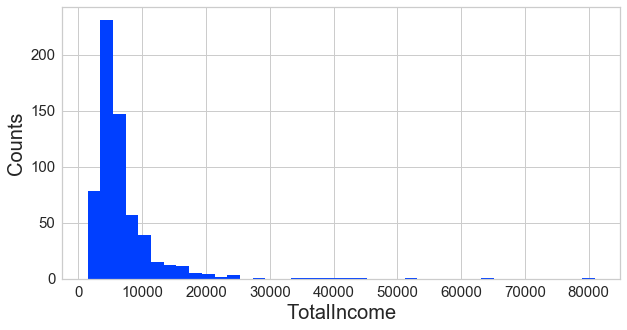

In [22]:
#Step 12 - Recheck Histogram.  Adjust skewed data (income)
# %matplotlib inline

# set up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

#check the distribution using histogram
plt.hist(data['TotalIncome'], bins=40)
plt.xlabel('TotalIncome', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [23]:
#Step 13 - convert categorical data to numbers

# get the categorical data
# set categorical features to Pclass, Sex, and Embarked
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


# define data_cat using categories above
data_cat = data[cat_features]

# check preliminary data
# print(data_cat.head(8))

# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

# check the data
print(data_cat_dummies.head(5))



   Gender_Female  Gender_Male  Married_No  Married_Yes  Dependents_0  \
0              0            1           1            0             1   
1              0            1           0            1             0   
2              0            1           0            1             1   
3              0            1           0            1             1   
4              0            1           1            0             1   

   Dependents_1  Dependents_2  Dependents_3+  Education_Graduate  \
0             0             0              0                   1   
1             1             0              0                   1   
2             0             0              0                   1   
3             0             0              0                   0   
4             0             0              0                   1   

   Education_Not Graduate  Self_Employed_No  Self_Employed_Yes  \
0                       0                 1                  0   
1                       0 

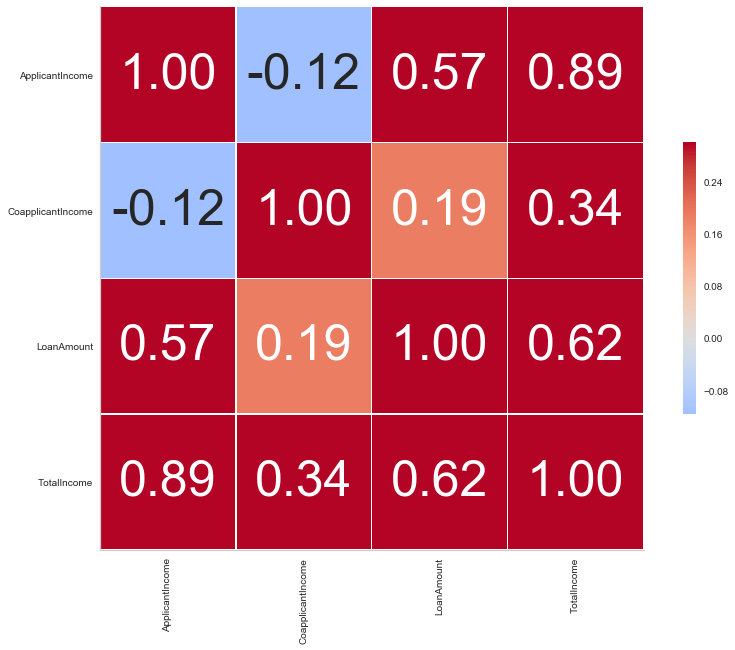

In [24]:
# ADDED:

import seaborn as sns

corr = data.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [25]:
# step 11.a.
# determine numerical features to drop using component analysis

# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# select numeric columns
digits = data[['TotalIncome', 'LoanAmount', 'Loan_Amount_Term']]

# standardize the feature matrix
features = StandardScaler().fit_transform(digits)

# create a pca that will retain 95% of variance
pca = PCA(n_components=0.95, whiten=True)

# conduct pca
features_pca = pca.fit_transform(features)

# print results
print("original number of features:", features.shape[1])
print("reduced number of features:", features_pca.shape[1])


original number of features: 3
reduced number of features: 3


In [26]:
# adjusted threhold to 0.75
# Step 11.1. Reduce features(-cont-)
# determine categorical features to drop using thresholding binary feature selection

# load library
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=(0.75))

# fit selector to normalized df
sel.fit(data_cat_dummies/data_cat_dummies.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_cat = data_cat_dummies.loc[:, mask]

print(data_cat_dummies.shape)
print(reduced_cat.shape)
print(type(reduced_cat))


(614, 17)
(614, 11)
<class 'pandas.core.frame.DataFrame'>


In [27]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together

# import modules
from sklearn.model_selection import train_test_split

# define features model with the 3 numerical features we want to keep
features_model = ['TotalIncome', 'LoanAmount', 'Loan_Amount_Term']

# combine features we are keeping with dummies (binary fields we want to keep)
data_model_X = pd.concat([data[features_model], reduced_cat], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
# define target dataset to predict who was approved for a loan
data_model_y = data.replace({'Loan_Status': {'Y': 'Approved', 'N': 'Not_Approved'}})['Loan_Status']

# separate data into training and validation and check the details of the datasets
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# print number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# new line
print('\n')
# print approved and not-approved in training set
print('No. of approved and not-approved in the training set:')
print(y_train.value_counts())

# new line
print('\n')
# print approved and not-approved in test set
print('No. of approved and not-approved in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  429
No. of samples in validation set: 185


No. of approved and not-approved in the training set:
Approved        301
Not_Approved    128
Name: Loan_Status, dtype: int64


No. of approved and not-approved in the validation set:
Approved        121
Not_Approved     64
Name: Loan_Status, dtype: int64


C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


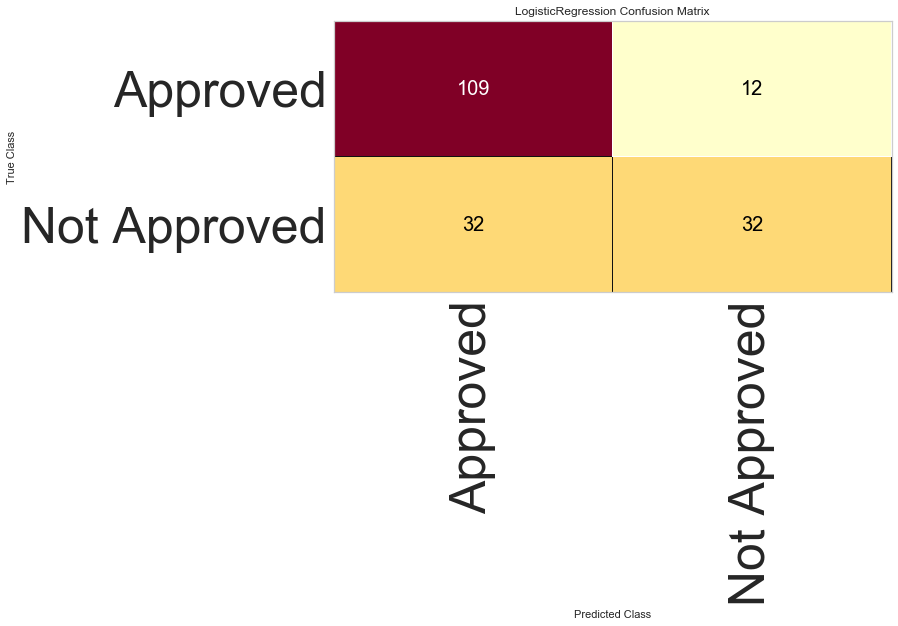

In [28]:
# Step 15 - Eval Metrics

# import libraries
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

# define classes for confusion matrix
classes = ['Approved','Not Approved']

# define confusion matrix with logistic regression model and classes
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()



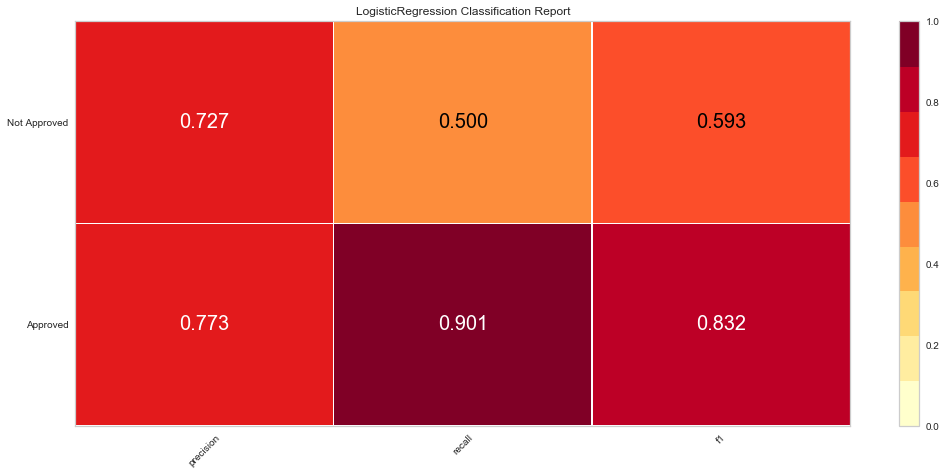

AxesSubplot(0.0831944,0.125843;0.717444x0.803429)


In [29]:
# Precision, Recall, and F1 Score
# Using classification report
#%matplotlib inline

# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_val, y_val)  

# print results
g = visualizer.poof()
print(g)


In [30]:
# ADDED
# Determine precision, recall, and f1 score
# Import the necessary modules

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size=0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153   8]
 [ 57  28]]
              precision    recall  f1-score   support

    Approved       0.73      0.95      0.82       161
Not_Approved       0.78      0.33      0.46        85

    accuracy                           0.74       246
   macro avg       0.75      0.64      0.64       246
weighted avg       0.75      0.74      0.70       246



C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


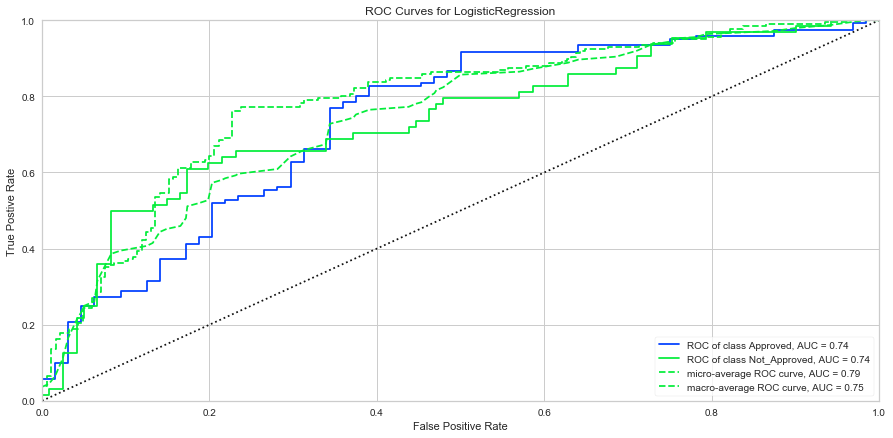

AxesSubplot(0.125,0.125;0.775x0.755)


In [31]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_val, y_val)  

# print results
g = visualizer.poof()
print(g)

In [32]:
# ADDED:
# determne auc score using k-fold validation
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))


# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, data_model_X, data_model_y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.7307270734380709
AUC scores computed using 5-fold cross-validation: [0.82413273 0.65641026 0.72587719 0.74655388 0.74467419]


C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin